# Data Preprocessing

## Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math

## Data Imports

In [2]:
sns.get_dataset_names() #these are the datasets present in seaborn

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset("titanic")

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exploratory Data Analysis

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='pclass', ylabel='count'>

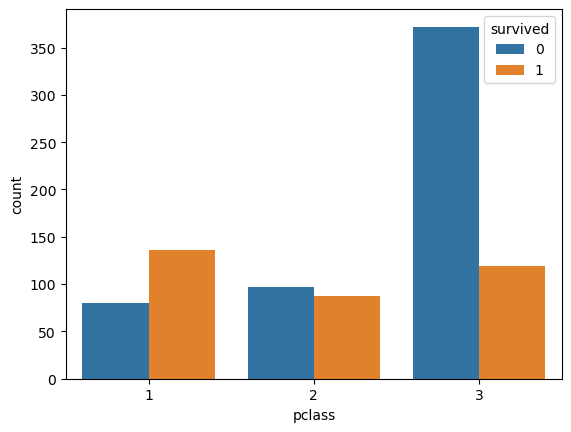

In [7]:
sns.countplot(x='pclass', hue='survived', data=titanic)

<Axes: xlabel='sex', ylabel='count'>

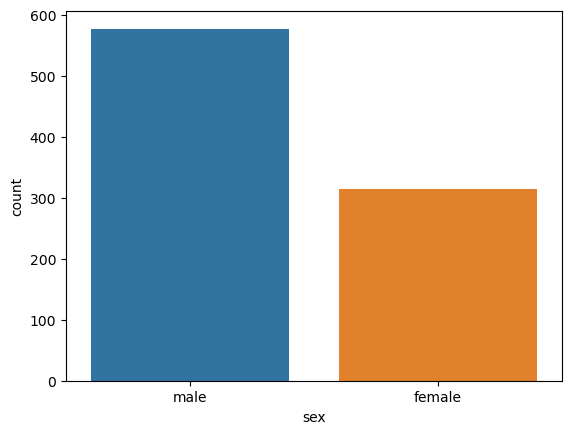

In [8]:
sns.countplot(x='sex', hue='sex', data=titanic)

<Axes: xlabel='embark_town', ylabel='count'>

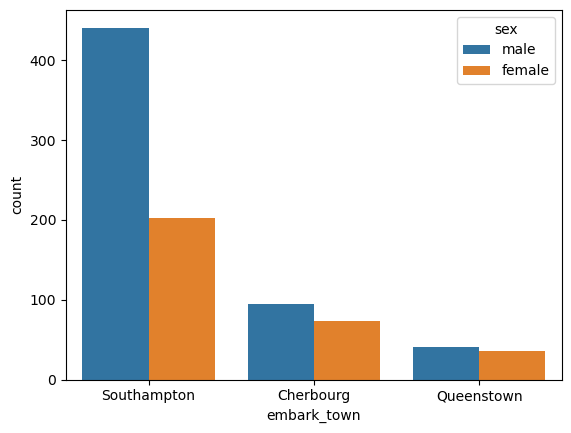

In [9]:
sns.countplot(x = "embark_town",hue = "sex", data = titanic)

<Axes: xlabel='age', ylabel='Count'>

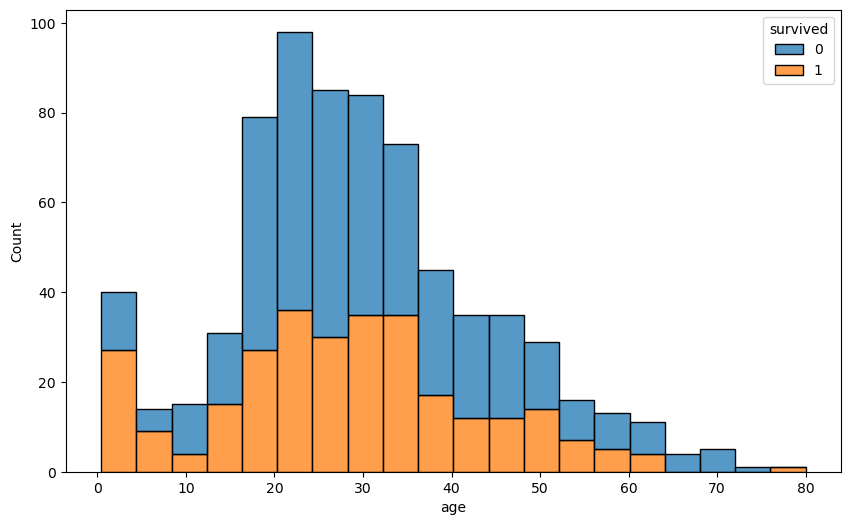

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=False)

In [11]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
for i in titanic.columns:
    print(f"{i}--------->{titanic[i].unique()}")

survived--------->[0 1]
pclass--------->[3 1 2]
sex--------->['male' 'female']
age--------->[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp--------->[1 0 3 4 2 5 8]
parch--------->[0 1 2 5 3 4 6]
fare--------->[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   

In [13]:
titanic.sex.unique()

array(['male', 'female'], dtype=object)

## Handling Missing Values

In [14]:
titanic.isnull().sum(),titanic.shape

(survived         0
 pclass           0
 sex              0
 age            177
 sibsp            0
 parch            0
 fare             0
 embarked         2
 class            0
 who              0
 adult_male       0
 deck           688
 embark_town      2
 alive            0
 alone            0
 dtype: int64,
 (891, 15))

In [15]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [16]:
titanic.age.fillna(titanic.age.median(),inplace = True)
titanic.embarked.fillna(titanic.embarked.mode()[0],inplace = True)
titanic.embark_town.fillna(titanic.embark_town.mode()[0],inplace = True)

C:\Users\bavit\AppData\Local\Temp\ipykernel_10036\3535248977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.age.fillna(titanic.age.median(),inplace = True)
C:\Users\bavit\AppData\Local\Temp\ipykernel_10036\3535248977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
fare25per = titanic.fare.quantile(0.25)
fare50per = titanic.fare.quantile(0.50)
fare75per = titanic.fare.quantile(0.75)
row = 0
for i in titanic.deck:
    if i not in ['C', 'E', 'G', 'D', 'A', 'B', 'F']:
        if titanic["fare"].iloc[row] <= fare25per:
            titanic["deck"].iloc[row] = "A"
        elif fare25per < titanic["fare"].iloc[row] <= fare50per:
            titanic["deck"].iloc[row] = "C"
        elif fare50per < titanic["fare"].iloc[row] <= fare75per:
            titanic["deck"].iloc[row] = "E"
        else:
            titanic["deck"].iloc[row] = "F"
        print(titanic["deck"].iloc[row])
    row += 1
        
            


A
C
C
C
E
C
E
C
F
A
E
E
C
E
A
E
C
E
F
A
A
A
E
A
C
F
F
A
C
E
C
C
E
A
F
A
C
E
A
E
E
F
A
E
C
A
E
F
A
E
E
E
C
C
C
C
F
F
C
F
A
C
E
C
C
C
A
F
C
E
F
C
C
C
A
E
A
C
E
E
A
A
C
C
A
A
A
A
E
C
C
C
E
C
A
E
F
F
C
E
C
A
A
A
A
A
E
E
C
E
C
E
A
E
A
C
F
A
F
C
C
C
E
A
F
A
C
C
F
E
E
A
C
F
E
E
E
F
E
C
C
A
E
C
A
F
E
F
E
E
E
E
A
C
C
A
A
C
A
C
C
F
A
A
C
E
E
A
A
E
A
C
A
C
E
C
C
C
C
A
C
C
A
C
E
A
C
F
C
A
E
E
C
C
C
E
C
A
A
A
E
E
A
E
E
E
F
F
E
A
F
A
C
F
A
E
A
E
A
A
A
E
E
A
A
C
C
C
C
A
C
A
F
C
A
E
A
A
E
A
C
F
E
E
A
E
A
E
C
A
A
C
E
F
A
E
E
E
F
A
C
F
C
C
C
C
E
E
C
C
A
E
A
C
C
A
A
E
E
C
A
E
A
A
A
A
C
F
E
F
A
A
A
F
E
C
F
A
F
F
C
A
C
A
C
A
A
E
C
C
C
C
C
E
C
E
A
E
A
E
A
A
A
C
C
F
C
C
E
A
A
A
C
E
A
E
E
A
E
E
A
F
E
C
E
C
A
C
C
E
E
E
E
E
C
A
C
A
C
C
C
A
A
E
A
E
A
C
E
C
E
A
A
C
F
A
C
C
E
C
E
E
A
F
C
E
E
A
C
A
A
C
E
E
E
F
A
C
F
A
E
E
A
A
A
A
A
C
C
C
E
A
A
E
C
E
F
E
F
F
E
E
E
C
E
F
E
A
A
A
E
F
E
A
A
C
C
C
E
A
E
A
A
C
A
C
E
C
E
C
E
E
C
E
C
C
A
A
A
E
E
F
A
A
E
A
F
C
E
E
A
E
F
F
A
E
A
C
F
C
E
C
C
E
A
E
C
A
A
A
A
E
C
C
E
F
E
A
E
F


C:\Users\bavit\AppData\Local\Temp\ipykernel_10036\1361746753.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic["deck"].iloc[row] = "A"
C:\Users\bavit\AppData\Local\Temp\ipykernel_10036\1361746753.py:10: FutureWarning: ChainedAssign

In [19]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,A,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,E,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Feature Engineering

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
Encoding = OneHotEncoder(sparse_output=False)

In [23]:
columns = titanic.select_dtypes(include= ["object","category","bool"]).columns.tolist()
print(f"columns -------> {columns}")

columns -------> ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [24]:
encObj = Encoding.fit_transform(titanic[columns])
Encoding.get_feature_names_out(columns)

array(['sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'class_First', 'class_Second', 'class_Third', 'who_child',
       'who_man', 'who_woman', 'adult_male_False', 'adult_male_True',
       'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F',
       'deck_G', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes', 'alone_False',
       'alone_True'], dtype=object)

In [25]:
dataObj = pd.DataFrame(encObj,columns = Encoding.get_feature_names_out(columns))
dataObj.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [26]:
titanic.drop(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],inplace = True,axis = 1)

In [27]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [28]:
titanic = pd.concat([titanic,dataObj],axis = 1)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,...,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


## Handling Outlier

<Axes: ylabel='fare'>

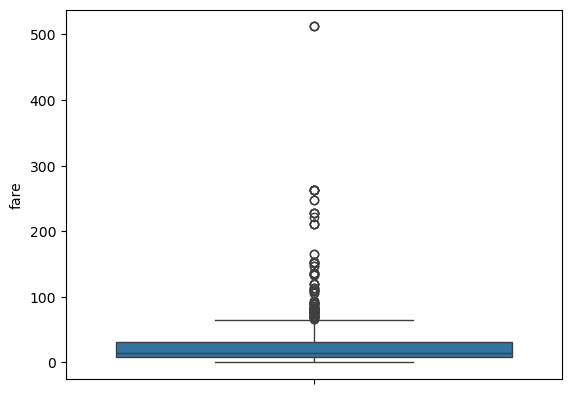

In [29]:
sns.boxplot(titanic["fare"])

In [30]:
q1 = titanic.fare.quantile(0.25)
q3 = titanic.fare.quantile(0.75)
interquartile_range = q3 - q1
lower_bd = q1 - (1.5*interquartile_range)
upper_bd = q3 + (1.5*interquartile_range)
print(f"Interquartile range ------> {interquartile_range}")
print(f"Lower bound ------> {lower_bd}")
print(f"Upper bound ------> {upper_bd}")
print(f"Mean of fare columns ------> {titanic.fare.mean()}")

Interquartile range ------> 23.0896
Lower bound ------> -26.724
Upper bound ------> 65.6344
Mean of fare columns ------> 32.204207968574636


## Data Visualization

<Axes: ylabel='fare'>

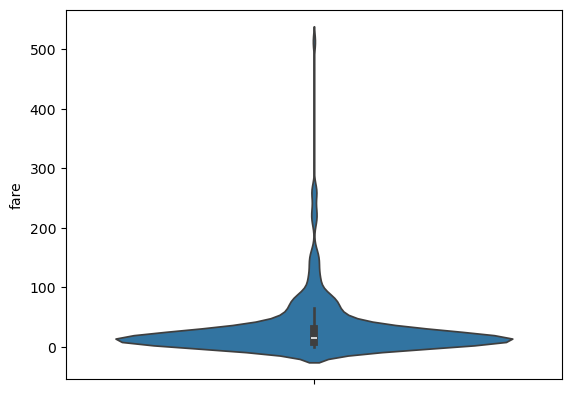

In [31]:
sns.violinplot(titanic.fare)

<Axes: xlabel='age', ylabel='fare'>

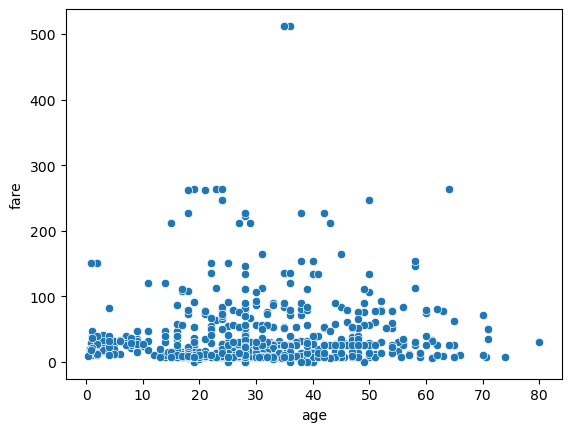

In [32]:
sns.scatterplot(x = "age" ,y = "fare", data = titanic)

In [33]:
X = titanic.drop("survived",axis = 1)
y = titanic.survived
X.isnull().sum()

pclass                     0
age                        0
sibsp                      0
parch                      0
fare                       0
sex_female                 0
sex_male                   0
embarked_C                 0
embarked_Q                 0
embarked_S                 0
class_First                0
class_Second               0
class_Third                0
who_child                  0
who_man                    0
who_woman                  0
adult_male_False           0
adult_male_True            0
deck_A                     0
deck_B                     0
deck_C                     0
deck_D                     0
deck_E                     0
deck_F                     0
deck_G                     0
embark_town_Cherbourg      0
embark_town_Queenstown     0
embark_town_Southampton    0
alive_no                   0
alive_yes                  0
alone_False                0
alone_True                 0
dtype: int64

# Model Building

## Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Initialization

In [35]:
logisticReg = LogisticRegression()

## Model Training

In [36]:
logisticReg.fit(X_train, y_train)

C:\Users\bavit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Hyper Parameter Tunning

# Evaluation and Result

In [37]:
y_pred = logisticReg.predict(X_test)
y_pred.shape

(268,)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}%")

Accuracy: 1.0%


In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[157   0]
 [  0 111]]


<Axes: >

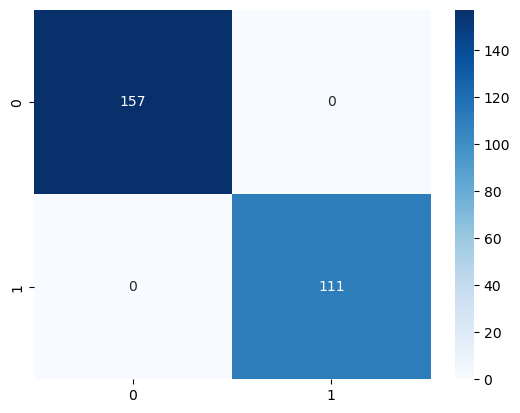

In [40]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

# Errors

In [41]:
sns.jointplot(x = "sepal_length",y = "sepal_width",data = iris,hue="species",kind = "resid")

NameError: name 'iris' is not defined

In [ ]:
titanic.corr()

* The error message "could not convert string to float: 'male'"
*  typically occurs when you're trying to perform a mathematical or machine learning operation on data that includes non-numeric values. In this case, the error is caused by the string 'male' in your dataset, indicating that your data contains categorical variables (e.g., gender) that need to be encoded numerically before they can be processed by a model or calculation that expects numerical input.
One of the method to convert this categorical values into numerical value is
* One-Hot Encoding creates a binary column for each category. For example, if you have a "gender" column with values "male" and "female", it creates two new columns: "gender_male" and "gender_female". Each row will have a 1 in one of these columns and a 0 in the other.

In [ ]:
encObj = pd.DataFrame(encObj,columns = objcol)